In [4]:
import matplotlib.pyplot as plt
import math
import numpy as np

Best fit line equation: y =  506.0180045651387 x + 0.08225377050579162
Best fit line equation: y =  26417869915.558365 x  -45453.48934667391


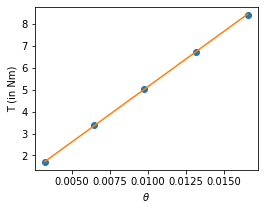

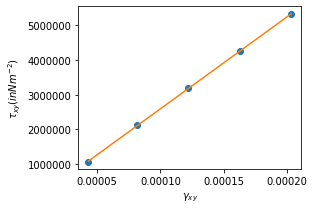

In [43]:
s = 0.13 # torque arm (in meters)
L = 0.70 # Length of the shaft (in meters)
d = 0.344 # in meters
R = ((20.06 + 19.98 + 20.12)/2)/3 # Average Radius (in mm)
R=R/1000 # in meters
J = math.pi * (R**4) / 2 # Polar Moment of Inertia
P = np.array([0.5, 1, 1.5, 2, 2.5])*9.8 # Load (in N)
T = P*d # Torque (in Nm)
h = np.array([0.42, 0.84, 1.27, 1.71, 2.15])/1000 # in meters
theta = h/s # in radians
t = T*R/J # shear stress in N/(m*m)
e0  = np.array([0, -1, -1, -1.5, -2])/(10**6) # strain at 0 deg
e45 = np.array([22.5, 40.5, 61.0, 81.4, 101.5])/(10**6) # strain at 45 deg
e90 = np.array([2, 0.5, 1.25, 1.1, 1.4])/(10**6) # strain at 90 deg
Yxy = 2*e45 - (e0 + e90) # shear strain

m1,c1=np.polyfit(theta, T, 1)
print('Best fit line equation: y = ',m1,'x +',c1)
fig=plt.figure(figsize=(4,3))
plt.plot(theta, T, 'o')
plt.plot(theta, m1*theta + c1)
plt.xlabel(r'$\theta$')
plt.ylabel('T (in Nm)')
fig.savefig('plot1.png', format='png', dpi=300)

m2,c2=np.polyfit(Yxy, t, 1)
print('Best fit line equation: y = ',m2,'x ',c2)
fig1=plt.figure(figsize=(4,3))
plt.plot(Yxy, t, 'o')
plt.plot(Yxy, m2*Yxy + c2)
plt.xlabel(r'$\gamma_{xy}$')
plt.ylabel(r'$\tau_{xy} (in Nm^{-2})$')
fig1.savefig('plot2.png', format='png', dpi=300)